In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [3]:
train = pd.read_csv('/home/jupyter-samuel/train_mrkr.csv')
test = pd.read_csv('/home/jupyter-samuel/test_mrkr.csv')
val = pd.read_csv('/home/jupyter-samuel/val_mrkr.csv')

In [4]:
# test['fold'].unique()
# test['merge_column'].unique()
test = test.assign(dataset = 'test')
val = val.assign(dataset = 'val')
train = train.assign(dataset = 'train')

In [5]:
stacked_df = pd.concat([train, val, test], ignore_index=True)

In [6]:
stacked_df['dataset'].value_counts()

dataset
train    9680
test     1168
val      1100
Name: count, dtype: int64

In [7]:
stacked_df.nunique()

empi_anon                       2845
image                           4161
laterality                         2
cropped_png_path                8322
StudyDate_anon                  1852
knee_pain_binary_threshold_4       2
knee_pain_binary_threshold_7       2
hardware                           1
weightbearing                      1
horizontal_flip                    2
lateral_JSN                        4
medial_JSN                         4
KLG                                5
pain_score                        11
DOB_anon                        2510
GENDER                             2
RACE                               7
ETHNICITY                          5
dob                             2510
age                               35
merge_column                     113
fold                              10
dataset                            3
dtype: int64

In [8]:
print(stacked_df['knee_pain_binary_threshold_4'].value_counts())
stacked_df['knee_pain_binary_threshold_7'].value_counts()

knee_pain_binary_threshold_4
1    7902
0    4046
Name: count, dtype: int64


knee_pain_binary_threshold_7
0    7245
1    4703
Name: count, dtype: int64

In [9]:
stacked_df['lateral_JSN'].value_counts()

lateral_JSN
0    10527
1      658
2      535
3      228
Name: count, dtype: int64

In [10]:
stacked_df['lateral_JSN'].value_counts()

lateral_JSN
0    10527
1      658
2      535
3      228
Name: count, dtype: int64

<Axes: >

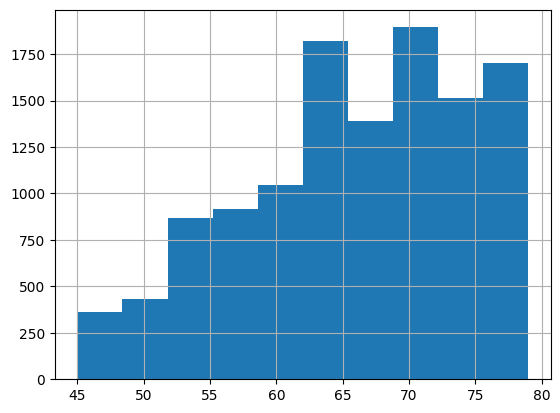

In [11]:
stacked_df['age'].hist()

<Axes: xlabel='KLG', ylabel='count'>

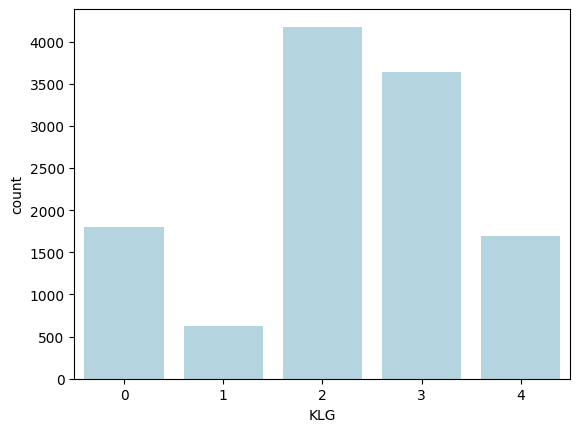

In [12]:
# stacked_df['KLG'].hist()
sns.countplot(data = stacked_df, x = 'KLG', color='lightblue')

<Axes: xlabel='pain_score', ylabel='count'>

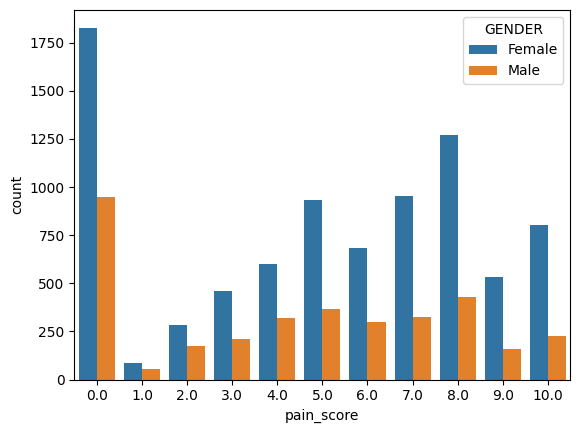

In [13]:
sns.countplot(data = stacked_df, x = 'pain_score', hue = 'GENDER')

In [14]:
stacked_bw = stacked_df.isin(['African American  or Black','Caucasian or White'])

In [15]:
# sns.kdeplot(data=stacked_bw, x='pain_score')

In [16]:
stacked_df['RACE'].value_counts()
stacked_df['KLG'].value_counts()
stacked_df['dataset'].value_counts()

dataset
train    9680
test     1168
val      1100
Name: count, dtype: int64

In [17]:
trainval = stacked_df[(stacked_df.dataset != 'test')]

In [18]:
dummy_klg = pd.get_dummies(trainval['KLG'])
dummy_race = pd.get_dummies(trainval['RACE'])
dummy_klg.columns = ['klg_0', 'klg_1', 'klg_2', 'klg_3', 'klg_4']
# dummy_klg = dummy_klg.rename(columns={'0': 'klg_0', '1': 'klg1', '2': 'klg2', '3': 'klg3', '4': 'klg4'})

In [21]:
x_dummy_klg = dummy_klg.drop(['klg_0'], axis=1)

x_dummy_klg = sm.add_constant(x_dummy_klg)
x_dummy_klg = x_dummy_klg.astype(int)

In [20]:
# print(dummy_race)
# print(dummy_klg)
x_dummy = pd.concat([dummy_race, dummy_klg], axis=1)
x_dummy = x_dummy.drop(['Caucasian or White', 'klg_0', 'Native Hawaiian or Other Pacific Islander'], axis=1)
x_dummy

,African American or Black,American Indian or Alaskan Native,Asian,Multiple,"Unknown, Unavailable or Unreported",klg_1,klg_2,klg_3,klg_4
0,True,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
10775,False,False,True,False,False,False,False,False,False
10776,False,False,True,False,False,False,False,False,False
10777,False,False,False,False,False,False,False,False,False
10778,False,False,False,False,False,False,False,False,False


In [81]:
y_4 = trainval['knee_pain_binary_threshold_4']
y_7 = trainval['knee_pain_binary_threshold_7']

In [82]:
import statsmodels.api as sm

x = sm.add_constant(x_dummy)
x = x.astype(int)

model_4 = sm.Logit(y_4, x).fit()
model_4.summary()


Optimization terminated successfully.
         Current function value: 0.609313
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                                
========================================================================================
Dep. Variable:     knee_pain_binary_threshold_4   No. Observations:                10780
Model:                                    Logit   Df Residuals:                    10770
Method:                                     MLE   Df Model:                            9
Date:                          Sun, 20 Aug 2023   Pseudo R-squ.:                 0.04547
Time:                                  17:32:24   Log-Likelihood:                -6568.4
converged:                                 True   LL-Null:                       -6881.3
Covariance Type:                      nonrobust   LLR p-value:                5.905e-129
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.2624      0.056     -4.665      0.000      -0.373      -0.152
African American  or Black             0.7198      0.044     16.253      0.000       0.633       0.807
American Indian or Alaskan Native      1.6486      1.099      1.500      0.134      -0.505       3.802
Asian                                  0.7779      0.113      6.865      0.000       0.556       1.000
Multiple                               0.5520      0.266      2.077      0.038       0.031       1.073
Unknown, Unavailable or Unreported     0.4415      0.106      4.181      0.000       0.235       0.648
klg_1                                  0.0811      0.100      0.808      0.419      -0.116       0.278
klg_2                                  0.4146      0.061      6.771      0.000       0.295       0.535
klg_3                                  0.8445      0.064     13.141      0.000       0.719       0.970
klg_4                                  1.3136      0.083     15.871      0.000       1.151       1.476
======================================================================================================
"""

In [83]:

test_dummy_klg = pd.get_dummies(test['KLG'])
test_dummy_race = pd.get_dummies(test['RACE'])
test_dummy_klg.columns = ['klg_0', 'klg_1', 'klg_2', 'klg_3', 'klg_4']

test_x_dummy = pd.concat([test_dummy_race, test_dummy_klg], axis=1)
test_x_dummy = test_x_dummy.drop(['Caucasian or White','klg_0'], axis=1)
test_x_dummy 

test_y_4 = test['knee_pain_binary_threshold_4']
test_y_7 = test['knee_pain_binary_threshold_7']

In [88]:
test_x_dummy = sm.add_constant(test_x_dummy)
test_x_dummy = test_x_dummy.astype(int)
predictions_4= model_4.predict(test_x_dummy)

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score



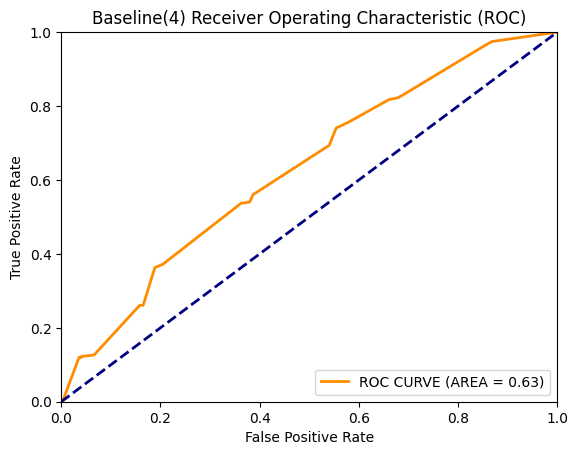

0.6277468173057416


In [98]:
auc_score = roc_auc_score(test_y_4, predictions_4)
fpr, tpr, thresholds = roc_curve(test_y_4, predictions_4)

roc_auc = auc(fpr, tpr)

plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label="ROC CURVE (AREA = %0.2f)" % roc_auc)
plt.plot([0,1], [0, 1], color = 'navy', lw=lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Baseline(4) Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

plt.show()
print(auc_score)

In [99]:
model_7 = sm.Logit(y_7, x).fit()
model_7.summary()

Optimization terminated successfully.
         Current function value: 0.637954
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                                
========================================================================================
Dep. Variable:     knee_pain_binary_threshold_7   No. Observations:                10780
Model:                                    Logit   Df Residuals:                    10770
Method:                                     MLE   Df Model:                            9
Date:                          Sun, 20 Aug 2023   Pseudo R-squ.:                 0.05048
Time:                                  17:47:15   Log-Likelihood:                -6877.1
converged:                                 True   LL-Null:                       -7242.7
Covariance Type:                      nonrobust   LLR p-value:                1.368e-151
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.4078      0.062    -22.660      0.000      -1.530      -1.286
African American  or Black             0.9730      0.044     22.338      0.000       0.888       1.058
American Indian or Alaskan Native      2.8552      1.098      2.600      0.009       0.703       5.007
Asian                                  0.6125      0.104      5.917      0.000       0.410       0.815
Multiple                               1.1133      0.248      4.482      0.000       0.626       1.600
Unknown, Unavailable or Unreported     0.6438      0.099      6.493      0.000       0.450       0.838
klg_1                                  0.0393      0.108      0.364      0.716      -0.172       0.251
klg_2                                  0.3116      0.065      4.781      0.000       0.184       0.439
klg_3                                  0.6150      0.066      9.284      0.000       0.485       0.745
klg_4                                  0.9905      0.077     12.934      0.000       0.840       1.141
======================================================================================================
"""

In [100]:
predictions_7= model_7.predict(test_x_dummy)

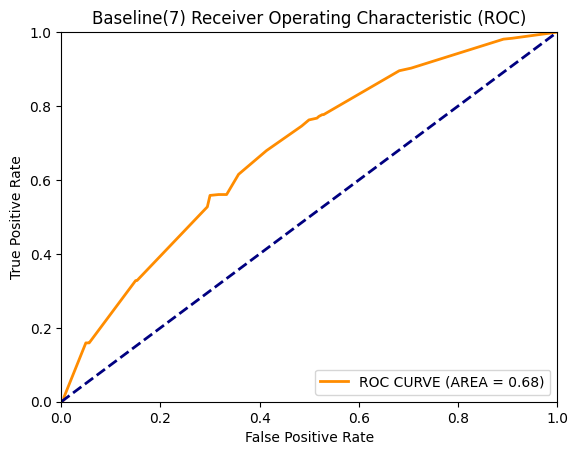

0.6776035257419226


In [102]:
auc_score = roc_auc_score(test_y_7, predictions_7)
fpr, tpr, thresholds = roc_curve(test_y_7, predictions_7)

roc_auc = auc(fpr, tpr)

plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label="ROC CURVE (AREA = %0.2f)" % roc_auc)
plt.plot([0,1], [0, 1], color = 'navy', lw=lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Baseline(7) Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

plt.show()
print(auc_score)

In [130]:
cnn7_test = pd.read_csv('/home/jupyter-samuel/output_mrkr/softmax_output_test_7_excluded.csv')
cnn7_train = pd.read_csv('/home/jupyter-samuel/output_mrkr/softmax_output_train_7_excluded.csv')
cnn7_val = pd.read_csv('/home/jupyter-samuel/output_mrkr/softmax_output_val_7_excluded.csv')
#softmax_output_train_7_excluded.csv
#softmax_output_val_7_excluded.csv
cnn7.columns
cnn7_trainval = pd.concat([cnn7_train, cnn7_val])
cnn7_trainval

,Class 1 Probability,Class 2 Probability
0,0.606155,0.393845
1,0.698701,0.301299
2,0.626360,0.373640
3,0.672577,0.327423
4,0.730505,0.269495
...,...,...
1095,0.493262,0.506738
1096,0.538983,0.461017
1097,0.657351,0.342649
1098,0.498761,0.501239


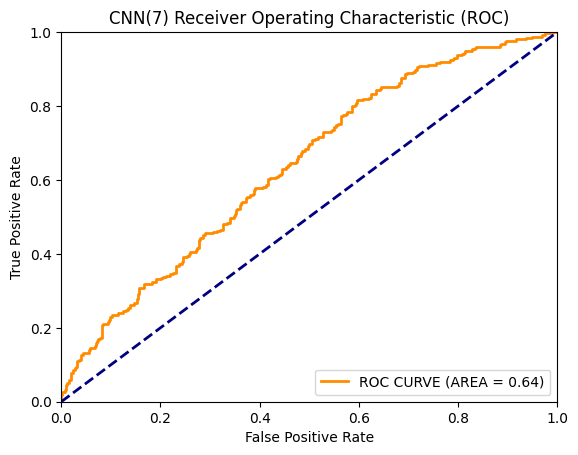

0.6388054196198888


In [109]:
auc_score = roc_auc_score(test_y_7, list(cnn7['Class 2 Probability']))
fpr, tpr, thresholds = roc_curve(test_y_7, list(cnn7['Class 2 Probability']))

roc_auc = auc(fpr, tpr)

plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label="ROC CURVE (AREA = %0.2f)" % roc_auc)
plt.plot([0,1], [0, 1], color = 'navy', lw=lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN(7) Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

plt.show()
print(auc_score)

In [153]:
print(dummy_race.shape)
len(list(cnn7_trainval['Class 2 Probability']))

trainval_score = cnn7_trainval['Class 2 Probability']
trainval_score

test_score = cnn7_test['Class 2 Probability']

(10780, 7)


In [147]:
cnn_x_dummy = pd.concat([dummy_race.reset_index(drop=True), trainval_score.reset_index(drop=True)], axis=1).drop(['Caucasian or White', 'Native Hawaiian or Other Pacific Islander'], axis=1)

In [148]:
cnn_x_dummy = sm.add_constant(cnn_x_dummy)
cnn_x_dummy = cnn_x_dummy.astype(float)

cnn_x_dummy

,const,African American or Black,American Indian or Alaskan Native,Asian,Multiple,"Unknown, Unavailable or Unreported",Class 2 Probability
0,1.0,1.0,0.0,0.0,0.0,0.0,0.393845
1,1.0,0.0,0.0,0.0,0.0,0.0,0.301299
2,1.0,0.0,0.0,0.0,0.0,0.0,0.373640
3,1.0,1.0,0.0,0.0,0.0,0.0,0.327423
4,1.0,0.0,0.0,0.0,0.0,0.0,0.269495
...,...,...,...,...,...,...,...
10775,1.0,0.0,0.0,1.0,0.0,0.0,0.506738
10776,1.0,0.0,0.0,1.0,0.0,0.0,0.461017
10777,1.0,0.0,0.0,0.0,0.0,0.0,0.342649
10778,1.0,0.0,0.0,0.0,0.0,0.0,0.501239


In [149]:
model_7_cnn = sm.Logit(y_7, cnn_x_dummy).fit()
model_7_cnn.summary()

Optimization terminated successfully.
         Current function value: 0.617442
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                                
========================================================================================
Dep. Variable:     knee_pain_binary_threshold_7   No. Observations:                10780
Model:                                    Logit   Df Residuals:                    10773
Method:                                     MLE   Df Model:                            6
Date:                          Sun, 20 Aug 2023   Pseudo R-squ.:                 0.08101
Time:                                  18:20:16   Log-Likelihood:                -6656.0
converged:                                 True   LL-Null:                       -7242.7
Covariance Type:                      nonrobust   LLR p-value:                2.717e-250
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -3.3346      0.103    -32.247      0.000      -3.537      -3.132
African American  or Black             0.6239      0.045     13.742      0.000       0.535       0.713
American Indian or Alaskan Native      1.9675      1.101      1.786      0.074      -0.191       4.126
Asian                                  0.4316      0.106      4.065      0.000       0.224       0.640
Multiple                               0.9023      0.253      3.561      0.000       0.406       1.399
Unknown, Unavailable or Unreported     0.4370      0.101      4.310      0.000       0.238       0.636
Class 2 Probability                    5.5660      0.222     25.032      0.000       5.130       6.002
======================================================================================================
"""

In [151]:
# test_x_dummy_cnn = pd.get_dummies(test['RACE']).drop(['Caucasian or White'], axis=1)
# test_x_dummy_cnn = sm.add_constant(test_x_dummy_cnn)
# test_x_dummy_cnn = test_x_dummy_cnn.astype(float)

In [157]:
test_x_dummy_cnn = pd.concat([pd.get_dummies(test['RACE']).reset_index(drop=True), test_score.reset_index(drop=True)], axis=1).drop(['Caucasian or White'], axis=1)
test_x_dummy_cnn = sm.add_constant(test_x_dummy_cnn)
test_x_dummy_cnn = test_x_dummy_cnn.astype(float)

In [158]:
predictions_7_cnn= model_7_cnn.predict(test_x_dummy_cnn)


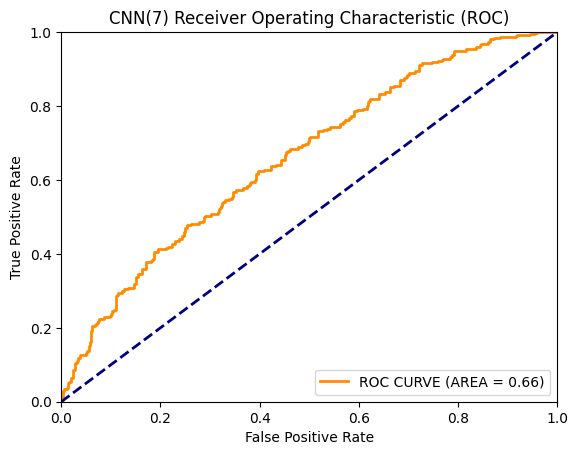

0.6611370263317721


In [160]:
auc_score = roc_auc_score(test_y_7, predictions_7_cnn)
fpr, tpr, thresholds = roc_curve(test_y_7, predictions_7_cnn)

roc_auc = auc(fpr, tpr)

plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label="ROC CURVE (AREA = %0.2f)" % roc_auc)
plt.plot([0,1], [0, 1], color = 'navy', lw=lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN(7) Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

plt.show()
print(auc_score)

In [ ]:
auc_score = roc_auc_score(test_y_7, predictions_7)
fpr, tpr, thresholds = roc_curve(test_y_7, predictions_7)

roc_auc = auc(fpr, tpr)

plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label="ROC CURVE (AREA = %0.2f)" % roc_auc)
plt.plot([0,1], [0, 1], color = 'navy', lw=lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Baseline(7) Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

plt.show()
print(auc_score)

In [20]:
X = stacked_df[['KLG', 'RACE']]
y = stacked_df['knee_pain_binary_threshold_4']

In [42]:
logit_model = sm.Logit(y, x_dummy)

In [43]:
result = logit_model.fit()

print("Adjusted R^2:", result.rsquared_adj)

Optimization terminated successfully.
         Current function value: 0.611016
         Iterations 5


AttributeError: 'LogitResults' object has no attribute 'rsquared_adj'

In [39]:
#logit_model = sm.Logit(y, X)
#result = logit_model.fit()
x_dummy = sm.add_constant(x_dummy)
logit_model = sm.Logit(y, x_dummy)
result = logit_model.fit()

print("Adjusted R^2:", result.rsquared_adj)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).